In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
from openpyxl import load_workbook
import os
from ccfj import GetStationPairs
from geopy.distance import great_circle
from scipy.interpolate import interp1d
from scipy.interpolate import griddata
#import shapefile
import geopandas as gp
import yaml
#from pykml import parser


In [4]:
import sys
sys.path.append(r'../')
from toollib_standard import plotlib

In [5]:
with open('a-project.yml', 'r', encoding='utf-8') as f:
    proj = yaml.load(f.read(), Loader=yaml.FullLoader)
proj_name = proj['name']
proj_name = 'project/output_FJSJ_11-03/'
proj_name

'project/output_FJSJ_11-03/'

In [6]:
filename = proj_name+'Basic_info.yml'
with open(filename, 'r', encoding='utf-8') as f:
    info_basic = yaml.load(f.read(), Loader=yaml.FullLoader)
filename_bi = proj_name+'Basic_info.npy'
info_basic_bi = np.load(filename_bi, allow_pickle='TRUE').item()      # setting dictionary

In [7]:
dir_image = info_basic['dir_image']
dir_inv_dispernet = info_basic['dir_inv_dispernet']
key_subworks = info_basic['key_subworks']
M = len(key_subworks)
key_subworks

['14-05',
 '16-05',
 '18-05',
 '20-05',
 '22-05',
 '24-05',
 '26-05',
 '28-05',
 '30-05',
 '32-05',
 '34-05',
 '36-05',
 '38-05',
 '40-05',
 '42-05',
 '44-05',
 '46-05',
 '14-07',
 '16-07',
 '18-07',
 '20-07',
 '22-07',
 '24-07',
 '26-07',
 '28-07',
 '30-07',
 '32-07',
 '34-07',
 '36-07',
 '38-07',
 '40-07',
 '42-07',
 '44-07',
 '46-07',
 '14-09',
 '16-09',
 '18-09',
 '20-09',
 '22-09',
 '24-09',
 '26-09',
 '28-09',
 '30-09',
 '32-09',
 '34-09',
 '36-09',
 '38-09',
 '40-09',
 '42-09',
 '44-09',
 '46-09',
 '14-11',
 '16-11',
 '18-11',
 '20-11',
 '22-11',
 '24-11',
 '26-11',
 '28-11',
 '30-11',
 '32-11',
 '34-11',
 '36-11',
 '38-11',
 '40-11',
 '42-11',
 '44-11',
 '46-11',
 '14-13',
 '16-13',
 '18-13',
 '20-13',
 '22-13',
 '24-13',
 '26-13',
 '28-13',
 '30-13',
 '32-13',
 '34-13',
 '36-13',
 '38-13',
 '40-13',
 '42-13',
 '44-13',
 '46-13',
 '14-15',
 '16-15',
 '18-15',
 '20-15',
 '22-15',
 '24-15',
 '26-15',
 '28-15',
 '30-15',
 '32-15',
 '34-15',
 '36-15',
 '38-15',
 '40-15',
 '42-15',


In [8]:

struc = {}
flag = 0
file_struc = dir_inv_dispernet + 'structure_model.xlsx'
df = pd.read_excel(file_struc,sheet_name=None)
for key_subwork in key_subworks:
    struc[key_subwork] = df[key_subwork]
    flag += 1
    print('Read structure model: %s (%d/%d)' % (key_subwork, flag, M))


Read structure model: 14-05 (1/102)
Read structure model: 16-05 (2/102)
Read structure model: 18-05 (3/102)
Read structure model: 20-05 (4/102)
Read structure model: 22-05 (5/102)
Read structure model: 24-05 (6/102)
Read structure model: 26-05 (7/102)
Read structure model: 28-05 (8/102)
Read structure model: 30-05 (9/102)
Read structure model: 32-05 (10/102)
Read structure model: 34-05 (11/102)
Read structure model: 36-05 (12/102)
Read structure model: 38-05 (13/102)
Read structure model: 40-05 (14/102)
Read structure model: 42-05 (15/102)
Read structure model: 44-05 (16/102)
Read structure model: 46-05 (17/102)
Read structure model: 14-07 (18/102)
Read structure model: 16-07 (19/102)
Read structure model: 18-07 (20/102)
Read structure model: 20-07 (21/102)
Read structure model: 22-07 (22/102)
Read structure model: 24-07 (23/102)
Read structure model: 26-07 (24/102)
Read structure model: 28-07 (25/102)
Read structure model: 30-07 (26/102)
Read structure model: 32-07 (27/102)
Read struc

In [9]:
"""
struc = {}
flag = 0
for key_subwork in key_subworks:
    file_struc = dir_inv_dispernet + '/model_'+key_subwork+'.txt'
    #struc[key_subwork] = np.loadtxt(file_struc)
    file = np.loadtxt(file_struc)

    flag += 1
    print('Read structure model: %s (%d/%d)' % (key_subwork, flag, M))
"""

"\nstruc = {}\nflag = 0\nfor key_subwork in key_subworks:\n    file_struc = dir_inv_dispernet + '/model_'+key_subwork+'.txt'\n    #struc[key_subwork] = np.loadtxt(file_struc)\n    file = np.loadtxt(file_struc)\n\n    flag += 1\n    print('Read structure model: %s (%d/%d)' % (key_subwork, flag, M))\n"

In [10]:
stalistname = info_basic['stalistname']
stainfo = pd.read_excel(stalistname+'.xlsx')
nsta_all = len(stainfo.iloc[:,0])
StationPairs_all = GetStationPairs(nsta_all)
nPairs_all = int(len(StationPairs_all)/2)
stalist_all = stainfo['Station'].tolist() 
lat_all =  stainfo['latitude'].tolist() 
lon_all =  stainfo['longitude'].tolist() 

In [11]:
#找到stalist_all中命名为R0101的台站的索引
index = stalist_all.index('R0101')
index

0

In [12]:
key_subworks = info_basic['key_subworks']
lat_this = []
lon_this = []
for key_subwork in key_subworks:
    if key_subwork in stalist_all:
        lat_this.append(lat_all[stalist_all.index(key_subwork)])
        lon_this.append(lon_all[stalist_all.index(key_subwork)])
    else:
        key1 = 'R' + str(int(key_subwork[0:2])-1).zfill(2)+key_subwork[3:5]
        key2 = 'R' + str(int(key_subwork[0:2])+1).zfill(2)+key_subwork[3:5]
        indx1 = stalist_all.index(key1)
        indx2 = stalist_all.index(key2)
        lat_this.append((lat_all[indx1]+lat_all[indx2])/2)
        lon_this.append((lon_all[indx1]+lon_all[indx2])/2)

### Plot horizontal of certain depth

In [13]:
def extract_horizontal(M,N,key_subworks,lat_all,lon_all):
    rows = []
    cols = []

    vs_all = np.zeros(len(key_subworks))
    lats_this = np.zeros(len(key_subworks))
    lons_this = np.zeros(len(key_subworks))

    for i in range(len(key_subworks)):
        key_subwork = key_subworks[i]
        key = 'R' +  key_subwork[0:2]+key_subwork[3:5]
        rows.append(int(key_subwork[3:5]))
        cols.append(int(key_subwork[0:2]))
        if key in stalist_all:
            indx = stalist_all.index(key)
            lats_this[i] = lat_all[indx]
            lons_this[i] = lon_all[indx]
            vs_all[i] = struc[key_subwork]['vs'].tolist()[N-1]
        else:
            key1 = 'R' + str(int(key_subwork[0:2])-1).zfill(2)+key_subwork[3:5]
            key2 = 'R' + str(int(key_subwork[0:2])+1).zfill(2)+key_subwork[3:5]
            indx1 = stalist_all.index(key1)
            indx2 = stalist_all.index(key2)
            lats_this[i] = (lat_all[indx1]+lat_all[indx2])/2
            lons_this[i] = (lon_all[indx1]+lon_all[indx2])/2
            vs_all[i] = struc[key_subwork]['vs'].tolist()[N]

    rows_flag = set(np.sort(rows))
    cols_flag = set(np.sort(cols))

    # reshape
    vs = np.zeros((len(rows_flag),len(cols_flag)))
    lats = np.zeros((len(rows_flag),len(cols_flag)))
    lons = np.zeros((len(rows_flag),len(cols_flag)))
    for i in range(len(rows_flag)):
        for j in range(len(cols_flag)):
            indx = i*len(cols_flag)+j
            vs[i,j] = vs_all[indx]
            lats[i,j] = lats_this[indx]
            lons[i,j] = lons_this[indx]

    # 2D interpolation
    xi = np.linspace(min(lons_this),max(lons_this),M)
    yi = np.linspace(min(lats_this),max(lats_this),M)
    # grid the data
    zi = griddata((lons_this, lats_this), vs_all, (xi[None,:], yi[:,None]), method='cubic')
    return zi,lats_this,lons_this

In [14]:
# fault surface trace
data = gp.read_file('Qfaults_GIS/SHP/Qfaults_US_Database.shp')
lons_clark1 = np.array(data.geometry[22150].coords.xy[0])
lats_clark1 = np.array(data.geometry[22150].coords.xy[1])
lons_clark2 = np.array(data.geometry[22151].coords.xy[0])
lats_clark2 = np.array(data.geometry[22151].coords.xy[1])
lons_clark3 = np.array(data.geometry[22152].coords.xy[0])
lats_clark3 = np.array(data.geometry[22152].coords.xy[1])
lons_clark4 = np.array(data.geometry[21973].coords.xy[0])
lats_clark4 = np.array(data.geometry[21973].coords.xy[1])
lons_clark5 = np.array(data.geometry[22148].coords.xy[0])
lats_clark5 = np.array(data.geometry[22148].coords.xy[1])

In [15]:
%%capture
M = 500
dz = 5
N = 100
c_min = 0.6
c_max = 1.4


N = 10

for i in range(N):
#for i in range(1,3):
    vs,lats_all,lons_all = extract_horizontal(M,i,key_subworks,lat_all,lon_all)
    fig,ax = plt.subplots(1,1,figsize=(10,7))
    ax.scatter(lon_all, lat_all,marker='.',color='k')
    #ax.set_xticks([])  #去掉横坐标值
    #ax.set_yticks([])  #去掉纵坐标值
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Vs at depth '+str((i+1)*dz))
    flag_add = 0.0005
    ax.set_xlim([min(lon_all)-flag_add, max(lon_all)+flag_add])
    ax.set_ylim([min(lat_all)-flag_add, max(lat_all)+flag_add])
    # Vs plot
    #cbar = np.linspace(c_min,c_max,20)
    im = ax.imshow(vs, vmin= c_min, vmax=c_max, origin='lower', extent=[min(lon_all), max(lon_all), min(lat_all), max(lat_all)], aspect='auto',cmap='gist_rainbow')
    #im = ax.imshow(vs, origin='lower', extent=[min(lon_all), max(lon_all), min(lat_all), max(lat_all)], aspect='auto',cmap='gist_rainbow')
    #im = ax.contourf(xi,yi,zi,15,cmap=plt.cm.jet,vmin=c_min, vmax=c_max)
    plt.colorbar(im)

    ax.plot(lons_clark1, lats_clark1, 'k')
    ax.plot(lons_clark2, lats_clark2, 'k')
    ax.plot(lons_clark3, lats_clark3, 'k')
    ax.plot(lons_clark4, lats_clark4, 'k')
    ax.plot(lons_clark5, lats_clark5, 'k')
    #ax.plot(lons_coyote, lats_coyote, 'k')

    filename = dir_image + 'Vs_hori_profile_'+str((i+1)*dz)+'m.png'
    plt.savefig(filename,dpi=100)

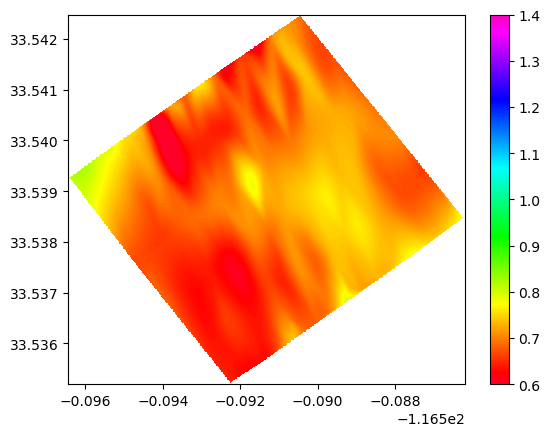

In [16]:
plt.imshow(vs, vmin= c_min, vmax=c_max, origin='lower', extent=[min(lon_all), max(lon_all), min(lat_all), max(lat_all)], aspect='auto',cmap='gist_rainbow')
plt.colorbar()

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

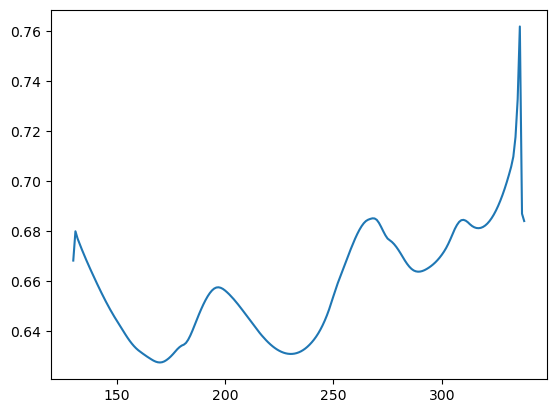

In [33]:
#查看vs的数据类型
plt.plot(vs[100])
print(vs[100])

In [18]:
lats_all

array([33.536747, 33.536861, 33.536953, 33.537075, 33.537205, 33.5373  ,
       33.537399, 33.537529, 33.537628, 33.537735, 33.537849, 33.537968,
       33.538048, 33.538174, 33.538296, 33.53838 , 33.538502, 33.53717 ,
       33.537308, 33.537415, 33.537521, 33.537655, 33.537735, 33.537846,
       33.537949, 33.538052, 33.538162, 33.538288, 33.538383, 33.53849 ,
       33.538597, 33.538712, 33.538818, 33.538933, 33.537613, 33.537724,
       33.537827, 33.537933, 33.538078, 33.538158, 33.538273, 33.538399,
       33.538486, 33.538597, 33.538704, 33.538811, 33.538914, 33.539036,
       33.539135, 33.539268, 33.53936 , 33.538036, 33.53812 , 33.5383  ,
       33.538376, 33.538506, 33.53862 , 33.538696, 33.538826, 33.538929,
       33.539032, 33.539112, 33.539257, 33.53936 , 33.539448, 33.539574,
       33.539661, 33.539783, 33.538486, 33.538593, 33.5387  , 33.538799,
       33.538944, 33.539043, 33.53915 , 33.53928 , 33.539364, 33.539478,
       33.539593, 33.539688, 33.53978 , 33.539886, 

In [19]:
min(lats_all)

33.536747

### Do clipper

In [12]:
def extract_verticle(row_tag,N,M,key_subworks):
    key_subworks_lists = []
    rows = []
    cols = []
    for key_subwork in key_subworks:
        row = key_subwork[3:5]
        col = key_subwork[0:2] 
        if row == str(row_tag):
            key_subworks_lists.append(key_subwork)
            rows.append(row)
            cols.append(col)
    
    # 根据行号排序
    rows = np.array(rows)
    cols = np.array(cols)
    indx = np.argsort(cols)
    rows = rows[indx]
    cols = cols[indx]
    key_subworks_lists = np.array(key_subworks_lists)
    key_subworks_lists = key_subworks_lists[indx]

    vs = np.zeros((len(key_subworks_lists),N))
    rs = np.zeros(len(key_subworks_lists))
    
    # 定义起始点的坐标
    key_start = 'R' + cols[0] + rows[0]
    if key_start in stalist_all:
        indx = stalist_all.index(key_start)
        lat_start = lat_all[indx]
        lon_start = lon_all[indx]
    else:
        key1 = 'R' + str(int(cols[0])-1).zfill(2)+rows[0]
        key2 = 'R' + str(int(cols[0])+1).zfill(2)+rows[0]
        indx1 = stalist_all.index(key1)
        indx2 = stalist_all.index(key2)
        lat_start = (lat_all[indx1]+lat_all[indx2])/2
        lon_start = (lon_all[indx1]+lon_all[indx2])/2

    # 算r
    flag_this = 0
    for key_subwork in key_subworks_lists:
        key = 'R' +  key_subwork[0:2]+key_subwork[3:5]
        
        if key in stalist_all:
            indx = stalist_all.index(key)
            rs[flag_this] = great_circle((lat_start,lon_start),(lat_all[indx],lon_all[indx])).m
            vs[flag_this,:] = struc[key_subwork]['vs'].tolist()
        else:
            key1 = 'R' + str(int(key_subwork[0:2])-1).zfill(2)+key_subwork[3:5]
            key2 = 'R' + str(int(key_subwork[0:2])+1).zfill(2)+key_subwork[3:5]
            indx1 = stalist_all.index(key1)
            indx2 = stalist_all.index(key2)
            lat_this = (lat_all[indx1]+lat_all[indx2])/2
            lon_this = (lon_all[indx1]+lon_all[indx2])/2
            rs[flag_this] = great_circle((lat_start,lon_start),(lat_this,lon_this)).m
            vs[flag_this,:] = struc[key_subwork]['vs'].tolist()
        flag_this += 1
    vs = np.array(vs)

    # 插值
    vs_interp = np.zeros((M*len(rs),N))
    for i in range(N):
        f = interp1d(rs, vs[:,i], kind='cubic')
        vs_interp[:,i] = f(np.linspace(0,rs[-1],M*len(rs)))
    return vs_interp,np.linspace(0,rs[-1],M*len(rs))

In [13]:
%%capture
N = 100
M = 20
c_min = 0.4
c_max = 1.6
for i in range(5,16,2):
#for i in range(3,4):
    print(i)
    row_tag = str(i).zfill(2)
    vs,rs = extract_verticle(row_tag,N,M,key_subworks)
    fig,ax = plt.subplots(1,1,figsize=(12,6))
    im = ax.imshow(vs.T,aspect='auto',cmap='gist_rainbow',vmin=c_min, vmax=c_max,extent=[0,rs[-1],N*dz,0])
    ax.set_xlabel('Distance along the profile (m)')
    ax.set_ylabel('Depth (m)')
    ax.set_title('Vs profile at row '+row_tag)
    #在图中展示colorbar
    cbar = fig.colorbar(im)
    filename = dir_image + 'Vs_profile_row_'+row_tag+'.png'
    plt.savefig(filename,dpi=100)